# EXPLORING DATA

In [5]:
# Importing requied libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from collections import Counter

In [6]:
def Load_Dataset(data_dir):
    images = []
    labels = []
    label_names = os.listdir(data_dir)
    for label in label_names:
        image_paths = os.listdir(os.path.join(data_dir, label))
        for image_path in image_paths:
            image_full_path = os.path.join(data_dir, label, image_path)
            image = cv2.imread(image_full_path)
            if image is not None:
                image = cv2.resize(image, (224, 224))
                images.append(image)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {image_full_path}")

    return np.array(images), np.array(labels)

data_dir = r'C:\Users\Hp-pc\Desktop\IDL_Project\Dataset'
images, labels = Load_Dataset(data_dir)
images = images / 255.0

In [7]:
def Preprocessing(directory):
    empty_folders_found = False
    for root, dirs, files in os.walk(directory, topdown=False):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            if not os.listdir(dir_path):  # Check if the directory is empty
                print(f"Found and deleting empty folder: {dir_path}")
                os.rmdir(dir_path)
                empty_folders_found = True
    if not empty_folders_found:
        print("No empty folders found.")

data_dir = r'C:\Users\Hp-pc\Desktop\IDL_Project\Dataset'
images, labels = Load_Dataset(data_dir)
images = images / 255.0
Preprocessing(data_dir)

No empty folders found.


In [8]:
def Show_Images(images, labels, sample_size=5):
    unique_labels = np.unique(labels)
    fig, axes = plt.subplots(len(unique_labels), sample_size, figsize=(15, 5 * len(unique_labels)))
    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]
        for j in range(sample_size):
            if j < len(label_indices):
                image_index = label_indices[j]
                axes[i, j].imshow(images[image_index])
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
        axes[i, 0].set_ylabel(label, size='large')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

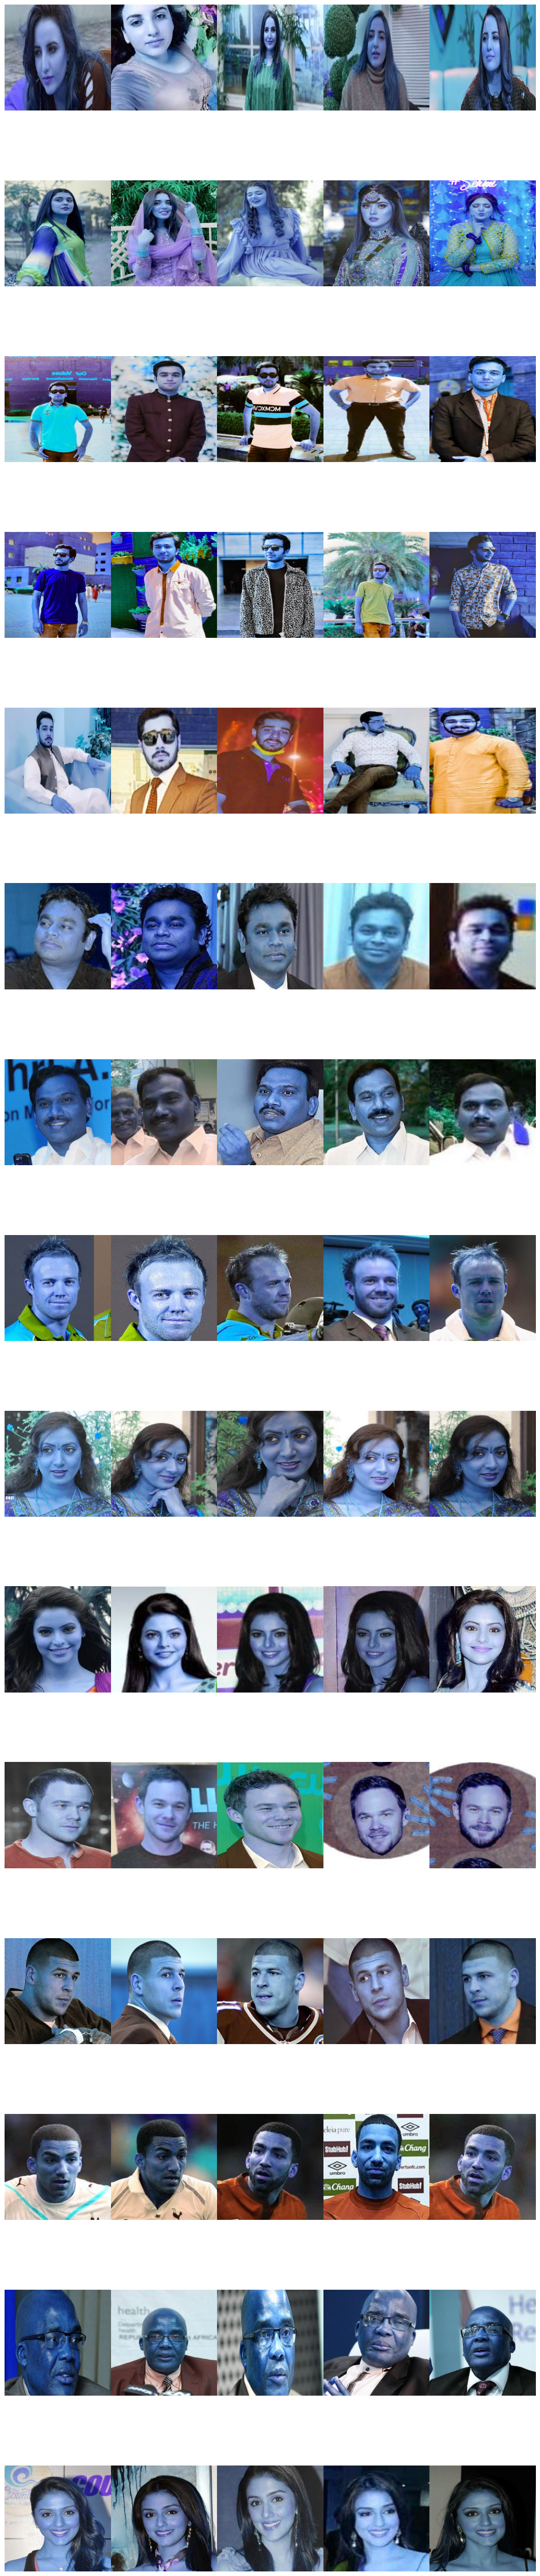

In [9]:
Show_Images(images, labels)

In [10]:
# Total images
print(f"Total number of images: {len(images)}")

Total number of images: 3223


In [11]:
# Count number of images per label
label_counts = Counter(labels)
for label, count in label_counts.items():
    print(f"Number of images in {label}: {count}")

Number of images in Hareem Shah: 10
Number of images in Kanwal Aftab: 10
Number of images in Maaz: 10
Number of images in n000006: 485
Number of images in n000007: 259
Number of images in n000008: 272
Number of images in n000010: 155
Number of images in n000011: 380
Number of images in n000012: 382
Number of images in n000013: 314
Number of images in n000014: 288
Number of images in n000015: 248
Number of images in n000022: 395
Number of images in Saif: 10
Number of images in Talha: 5
